In [1]:
#We first import some relevant packages

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gdp_df = pd.read_csv('gdp.csv', header = 2)
gdp_df.drop(columns = 'Unnamed: 65', inplace = True)

In [3]:
gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24985.013919,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,147.836769,147.238537,156.426780,182.521139,162.594548,180.489043,...,1686.695763,1672.363658,1653.188436,1658.650062,1507.800256,1404.953164,1540.232473,1534.171767,1485.307425,1330.140232
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,...,591.162798,641.871438,637.165464,613.856505,578.466353,509.220100,519.888913,493.756581,507.103392,508.808409
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.963779,113.114697,118.865837,123.478967,131.892939,138.566819,...,1827.518347,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332,1695.959215,1772.339155,1714.426800
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1895.770869


In [4]:
type(gdp_df.loc[5, '1960'])

numpy.float64

In [5]:
years = np.linspace(1960, 2020, num = 61, dtype = int)
print(years)

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020]


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

India
Root Mean Squared Error:  0.50394
Mean Absolute Error:  0.41586


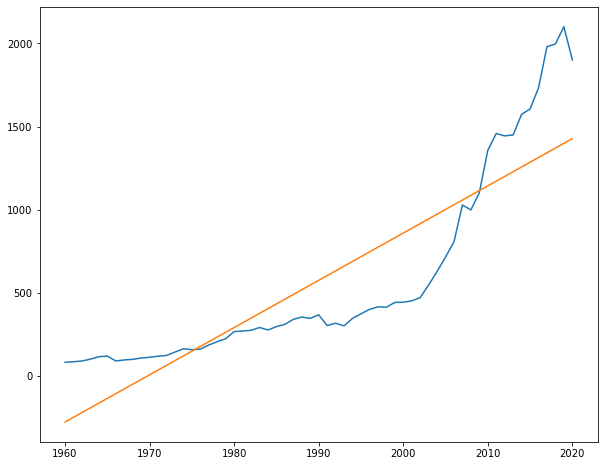

In [7]:
for index in gdp_df[gdp_df.loc[:, 'Country Name'] == 'India'].index:
    X_year = np.array([])
    y_gdp = np.array([])
    print(gdp_df.loc[index, 'Country Name'])
    for year in years:
        if str(gdp_df.loc[index, str(year)]) == 'nan':
            pass
        else:
            X_year = np.append(X_year, year)
            y_gdp = np.append(y_gdp, gdp_df.loc[index, str(year)])
        
    if len(X_year)>0:
        lr = LinearRegression()
        lr.fit(X_year.reshape(-1,1), y_gdp) 
    
        mean = np.mean(y_gdp)
    
        print('Root Mean Squared Error: ',
            np.round(mean_squared_error(y_gdp, lr.predict(X_year.reshape(-1,1)), squared = False)/mean, decimals =5  )
        )
    
        print('Mean Absolute Error: ',
            np.round(mean_absolute_error(y_gdp, lr.predict(X_year.reshape(-1,1)))/mean, decimals =5  )
        )
    
    
        plt.figure(figsize = (10,8))

        plt.plot(X_year, y_gdp)
        plt.plot(years.reshape(-1,1), lr.predict(years.reshape(-1,1)))
    
        plt.show()
    
    #print(X_year)
    #print(y_gdp)

In [8]:
gdp_analysis = pd.read_csv('gdp_analysis.csv')

In [9]:
gdp_analysis.head()

,country_name,slope,y_intercept,volatility,min_year,max_year,got_loan,got_mentioned
0,afghanistan,7.675012,-1.497918e+04,0.540344,1960.0,2020.0,0.0,0.0
1,albania,155.758189,-3.094915e+05,0.370373,1984.0,2020.0,1.0,1.0
2,algeria,76.377837,-1.498252e+05,0.568859,1960.0,2020.0,1.0,1.0
3,american samoa,228.691323,-4.494300e+05,0.597126,2002.0,2019.0,0.0,0.0
4,andorra,918.360834,-1.809247e+06,0.385188,1970.0,2019.0,0.0,0.0


In [10]:
np.amax(gdp_analysis.volatility.to_numpy())

55.6752716550477

In [11]:
np.amin(gdp_analysis.volatility.to_numpy())

0.1576817833987713

In [12]:
gdp_analysis.sort_values(by =['volatility']).head(n = 30)

,country_name,slope,y_intercept,volatility,min_year,max_year,got_loan,got_mentioned
44,dominica,180.541798,-3.564521e+05,0.157682,1977.0,2020.0,1.0,1.0
64,guam,936.788485,-1.852534e+06,0.159260,2002.0,2019.0,0.0,1.0
63,grenada,231.085876,-4.569039e+05,0.174002,1977.0,2020.0,1.0,1.0
164,united states,1084.532014,-2.131508e+06,0.179907,1960.0,2020.0,1.0,1.0
17,belize,91.188244,-1.791099e+05,0.183503,1960.0,2020.0,1.0,1.0
14,barbados,383.438545,-7.556287e+05,0.187702,1974.0,2020.0,1.0,1.0
100,marshall islands,68.273591,-1.342105e+05,0.199462,1981.0,2019.0,0.0,0.0
8,aruba,652.910823,-1.286856e+06,0.219549,1986.0,2018.0,0.0,0.0
59,germany,976.173423,-1.922227e+06,0.233368,1970.0,2020.0,1.0,1.0
92,lithuania,777.051175,-1.549517e+06,0.242538,1995.0,2020.0,1.0,1.0


In [13]:
gdp_analysis.sort_values(by =['volatility'], ascending = False).head(n = 50)

,country_name,slope,y_intercept,volatility,min_year,max_year,got_loan,got_mentioned
134,san marino,33.002932,-1.343402e+04,55.675272,1999.0,2019.0,0.0,0.0
90,libya,47.258808,-8.753295e+04,6.280215,1990.0,2020.0,0.0,1.0
30,cayman islands,255.784608,-4.353731e+05,5.549009,2006.0,2019.0,0.0,1.0
162,united arab emirates,269.046515,-5.036322e+05,1.653432,1975.0,2019.0,1.0,1.0
74,iraq,79.356191,-1.555202e+05,1.390769,1962.0,2020.0,1.0,1.0
170,zimbabwe,13.068093,-2.530177e+04,1.073576,1960.0,2020.0,1.0,1.0
106,mongolia,84.730692,-1.676854e+05,0.991296,1981.0,2020.0,1.0,1.0
51,ethiopia,13.914062,-2.752077e+04,0.983203,1981.0,2020.0,0.0,1.0
48,equatorial guinea,290.886515,-5.746780e+05,0.972777,1962.0,2020.0,0.0,1.0
169,zambia,19.341272,-3.782017e+04,0.911684,1960.0,2020.0,1.0,1.0


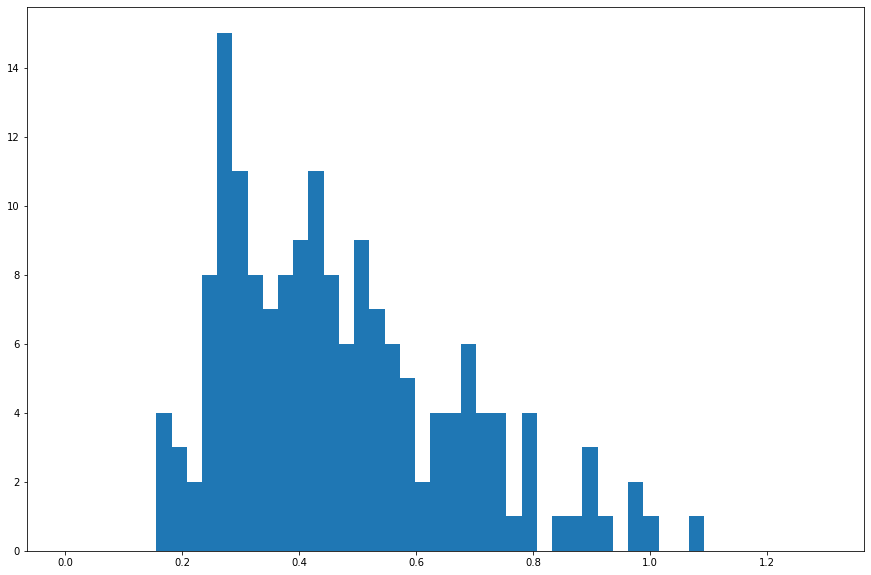

In [14]:
plt.figure(figsize = (15,10))

plt.hist(gdp_analysis.volatility.to_numpy(), bins = 50, range = (0,1.3))

plt.show()